<a href="https://colab.research.google.com/github/SSAG1406/Alexa/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 9.91M/9.91M [00:10<00:00, 902kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 64.5kB/s]
100%|██████████| 1.65M/1.65M [00:06<00:00, 241kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.26MB/s]


OverfitCNN - Epoch 1: Train Acc = 50.50%, Val Acc = 83.54%
OverfitCNN - Epoch 2: Train Acc = 89.43%, Val Acc = 92.78%
OverfitCNN - Epoch 3: Train Acc = 93.76%, Val Acc = 95.12%
OverfitCNN - Epoch 4: Train Acc = 95.33%, Val Acc = 94.28%
OverfitCNN - Epoch 5: Train Acc = 95.75%, Val Acc = 95.83%
OverfitCNN - Epoch 6: Train Acc = 96.58%, Val Acc = 96.14%
OverfitCNN - Epoch 7: Train Acc = 96.80%, Val Acc = 96.89%
OverfitCNN - Epoch 8: Train Acc = 97.17%, Val Acc = 96.41%
OverfitCNN - Epoch 9: Train Acc = 97.31%, Val Acc = 96.62%
OverfitCNN - Epoch 10: Train Acc = 97.33%, Val Acc = 97.05%
OverfitCNN - Epoch 11: Train Acc = 97.70%, Val Acc = 96.93%
OverfitCNN - Epoch 12: Train Acc = 97.73%, Val Acc = 96.96%
OverfitCNN - Epoch 13: Train Acc = 97.97%, Val Acc = 97.14%
OverfitCNN - Epoch 14: Train Acc = 97.88%, Val Acc = 97.15%
OverfitCNN - Epoch 15: Train Acc = 98.14%, Val Acc = 96.64%
OverfitCNN - Epoch 16: Train Acc = 98.41%, Val Acc = 97.18%
OverfitCNN - Epoch 17: Train Acc = 98.19%, Val Ac

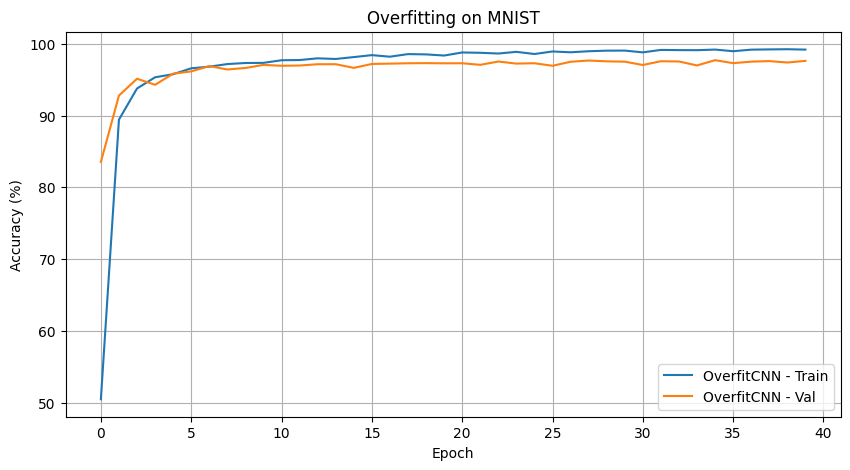


Final Test Accuracy (OverfitCNN):
Test Accuracy: 97.77%


In [1]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


transform = transforms.ToTensor()


full_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_data, val_data = random_split(full_train, [45000, 15000])
train_loader = DataLoader(train_data, batch_size=64)
val_loader = DataLoader(val_data, batch_size=64)
test_loader = DataLoader(test, batch_size=64)

class OverfitCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(256 * 1 * 1, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        return self.net(x)


def train_model(model, train_loader, val_loader, epochs=10, title="Model", weight_decay=0.0):
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.003, weight_decay=weight_decay)
    criterion = nn.CrossEntropyLoss()

    train_acc_list, val_acc_list = [], []

    for epoch in range(epochs):
        model.train()
        correct, total = 0, 0
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            correct += (out.argmax(1) == y).sum().item()
            total += y.size(0)
        train_acc = 100 * correct / total
        train_acc_list.append(train_acc)

        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for x, y in val_loader:
                x, y = x.to(device), y.to(device)
                out = model(x)
                correct += (out.argmax(1) == y).sum().item()
                total += y.size(0)
        val_acc = 100 * correct / total
        val_acc_list.append(val_acc)

        print(f"{title} - Epoch {epoch+1}: Train Acc = {train_acc:.2f}%, Val Acc = {val_acc:.2f}%")

    return train_acc_list, val_acc_list


overfit_model = OverfitCNN()
overfit_train_acc, overfit_val_acc = train_model(
    overfit_model, train_loader, val_loader, epochs=40, title="OverfitCNN", weight_decay=0.0
)

plt.figure(figsize=(10, 5))
plt.plot(overfit_train_acc, label="OverfitCNN - Train")
plt.plot(overfit_val_acc, label="OverfitCNN - Val")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Overfitting on MNIST")
plt.legend()
plt.grid(True)
plt.show()


def evaluate(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            out = model(x)
            correct += (out.argmax(1) == y).sum().item()
            total += y.size(0)
    print(f"Test Accuracy: {100 * correct / total:.2f}%")


print("\nFinal Test Accuracy (OverfitCNN):")
evaluate(overfit_model, test_loader)



L2RegularizedCNN - Epoch 1: Train Acc = 91.96%, Val Acc = 97.47%
L2RegularizedCNN - Epoch 2: Train Acc = 96.95%, Val Acc = 98.64%
L2RegularizedCNN - Epoch 3: Train Acc = 97.69%, Val Acc = 97.61%
L2RegularizedCNN - Epoch 4: Train Acc = 98.09%, Val Acc = 98.82%
L2RegularizedCNN - Epoch 5: Train Acc = 98.37%, Val Acc = 98.71%
L2RegularizedCNN - Epoch 6: Train Acc = 98.70%, Val Acc = 98.82%
L2RegularizedCNN - Epoch 7: Train Acc = 98.70%, Val Acc = 98.74%
L2RegularizedCNN - Epoch 8: Train Acc = 98.70%, Val Acc = 98.80%
L2RegularizedCNN - Epoch 9: Train Acc = 98.80%, Val Acc = 98.64%
L2RegularizedCNN - Epoch 10: Train Acc = 98.90%, Val Acc = 98.70%
L2RegularizedCNN - Epoch 11: Train Acc = 99.02%, Val Acc = 99.09%
L2RegularizedCNN - Epoch 12: Train Acc = 99.07%, Val Acc = 98.79%
L2RegularizedCNN - Epoch 13: Train Acc = 98.96%, Val Acc = 98.94%
L2RegularizedCNN - Epoch 14: Train Acc = 99.12%, Val Acc = 98.94%
L2RegularizedCNN - Epoch 15: Train Acc = 99.17%, Val Acc = 98.99%
L2RegularizedCNN - 

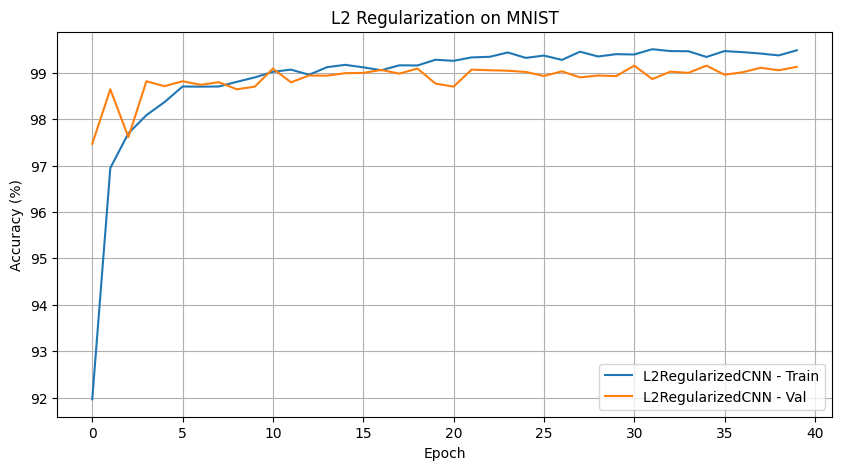


Final Test Accuracy (L2RegularizedCNN):
Test Accuracy: 99.22%


In [9]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

full_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_data, val_data = random_split(full_train, [45000,15000])
train_loader = DataLoader(train_data, batch_size=64)
val_loader = DataLoader(val_data, batch_size=64)
test_loader = DataLoader(test, batch_size=64)




import torch.nn as nn

class RegularizedCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout2d(0.05),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout2d(0.08),

            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout2d(0.15),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Dropout2d(0.2),

            nn.Flatten(),
            nn.Linear(256 * 1 * 1, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.25),

            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.1),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.1),

            nn.Linear(256, 10)
        )

    def forward(self, x):
        return self.net(x)



def train_model(model, train_loader, val_loader, epochs=10, title="Model", weight_decay=0.0):
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.003, weight_decay=weight_decay)
    criterion = nn.CrossEntropyLoss()




    train_acc_list, val_acc_list = [], []

    for epoch in range(epochs):
        model.train()
        correct, total = 0, 0
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            correct += (out.argmax(1) == y).sum().item()
            total += y.size(0)
        train_acc = 100 * correct / total
        train_acc_list.append(train_acc)

        model.eval()
        correct, total = 0, 0
        val_loss = 0
        with torch.no_grad():
            for x, y in val_loader:

                x, y = x.to(device), y.to(device)
                out = model(x)
                val_loss += criterion(out, y).item()
                correct += (out.argmax(1) == y).sum().item()
                total += y.size(0)
        val_acc = 100 * correct / total
        val_acc_list.append(val_acc)




        print(f"{title} - Epoch {epoch+1}: Train Acc = {train_acc:.2f}%, Val Acc = {val_acc:.2f}%")

    return train_acc_list, val_acc_list



improved_l2_model = RegularizedCNN()
improved_l2_train_acc, improved_l2_val_acc = train_model(
    improved_l2_model, train_loader, val_loader, epochs=40, title="L2RegularizedCNN", weight_decay=1e-5
)

plt.figure(figsize=(10, 5))
plt.plot(improved_l2_train_acc, label="L2RegularizedCNN - Train")
plt.plot(improved_l2_val_acc, label="L2RegularizedCNN - Val")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("L2 Regularization on MNIST")
plt.legend()
plt.grid(True)
plt.show()


def evaluate(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            out = model(x)
            correct += (out.argmax(1) == y).sum().item()
            total += y.size(0)
    print(f"Test Accuracy: {100 * correct / total:.2f}%")


print("\nFinal Test Accuracy (L2RegularizedCNN):")
evaluate(improved_l2_model, test_loader)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 496kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.68MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.92MB/s]


BaseCNN - Epoch 1: Train Acc = 71.21%, Val Acc = 94.25%
BaseCNN - Epoch 2: Train Acc = 90.67%, Val Acc = 96.49%
BaseCNN - Epoch 3: Train Acc = 93.20%, Val Acc = 97.57%
BaseCNN - Epoch 4: Train Acc = 94.65%, Val Acc = 97.96%
BaseCNN - Epoch 5: Train Acc = 95.65%, Val Acc = 98.11%
BaseCNN - Epoch 6: Train Acc = 96.39%, Val Acc = 97.99%
BaseCNN - Epoch 7: Train Acc = 96.48%, Val Acc = 98.09%
BaseCNN - Epoch 8: Train Acc = 96.68%, Val Acc = 98.35%
BaseCNN - Epoch 9: Train Acc = 96.89%, Val Acc = 98.22%
BaseCNN - Epoch 10: Train Acc = 97.28%, Val Acc = 98.59%
BaseCNN - Epoch 11: Train Acc = 97.29%, Val Acc = 98.28%
BaseCNN - Epoch 12: Train Acc = 97.66%, Val Acc = 98.85%
BaseCNN - Epoch 13: Train Acc = 97.59%, Val Acc = 98.79%
BaseCNN - Epoch 14: Train Acc = 97.76%, Val Acc = 98.83%
BaseCNN - Epoch 15: Train Acc = 97.92%, Val Acc = 98.97%
BaseCNN - Epoch 16: Train Acc = 97.90%, Val Acc = 98.92%
BaseCNN - Epoch 17: Train Acc = 98.00%, Val Acc = 98.93%
BaseCNN - Epoch 18: Train Acc = 98.12%, 

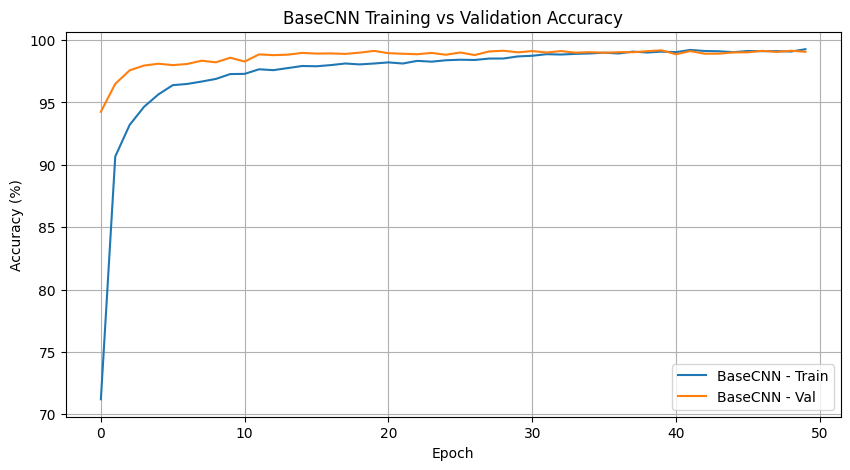


Final Test Accuracy (BaseCNN):
Test Accuracy: 98.89%


In [2]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])


full_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)


train_data, val_data = random_split(full_train, [45000, 15000])
train_loader = DataLoader(train_data, batch_size=64)
val_loader = DataLoader(val_data, batch_size=64)
test_loader = DataLoader(test, batch_size=64)


class BaseCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1,1)),


            nn.Flatten(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 10)

        )

    def forward(self, x):
        return self.net(x)


def train_model(model, train_loader, val_loader, epochs=10, title="Model", weight_decay=0.0):
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.003, weight_decay=weight_decay)
    criterion = nn.CrossEntropyLoss()

    train_acc_list, val_acc_list = [], []

    for epoch in range(epochs):
        model.train()
        correct, total = 0, 0
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            correct += (out.argmax(1) == y).sum().item()
            total += y.size(0)
        train_acc = 100 * correct / total
        train_acc_list.append(train_acc)

        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for x, y in val_loader:
                x, y = x.to(device), y.to(device)
                out = model(x)
                correct += (out.argmax(1) == y).sum().item()
                total += y.size(0)
        val_acc = 100 * correct / total
        val_acc_list.append(val_acc)

        print(f"{title} - Epoch {epoch+1}: Train Acc = {train_acc:.2f}%, Val Acc = {val_acc:.2f}%")

    return train_acc_list, val_acc_list


base_model = BaseCNN()
base_train_acc, base_val_acc = train_model(
    base_model, train_loader, val_loader, epochs=50, title="BaseCNN", weight_decay=0.0
)


plt.figure(figsize=(10, 5))
plt.plot(base_train_acc, label="BaseCNN - Train")
plt.plot(base_val_acc, label="BaseCNN - Val")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("BaseCNN Training vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

def evaluate(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            out = model(x)
            correct += (out.argmax(1) == y).sum().item()
            total += y.size(0)
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

print("\nFinal Test Accuracy (BaseCNN):")
evaluate(base_model, test_loader)
